## 3. Multi-label Classification

Multi-label classification is a variant of the classification problem where multiple target labels must be assigned to each sample

MultLabelTrainData contains 103 features with 500 samples. MultLabelTestData contains 103 features with 100 samples. The label file for the train data can be download at MultLabelTrainLabel
In the following dataset, there are totally 14 target labels. The samples in the training dataset are assigned with more than one target label. For example, in the first sample MultLabelTrainLabel, the label assignment for the first sample is 7, 8, 12 and 13. Those positions are marked with 1.

Please predict the labels for the test samples. The output file format of Testing Label should be consistent with MultLabelTrainLabel.

Logistic Regression - Success Percentage: 20.60%, F1 Score: 65.24%
MLP Classifier - Success Percentage: 88.60%, F1 Score: 98.30%
Random Forest - Success Percentage: 100.00%, F1 Score: 100.00%


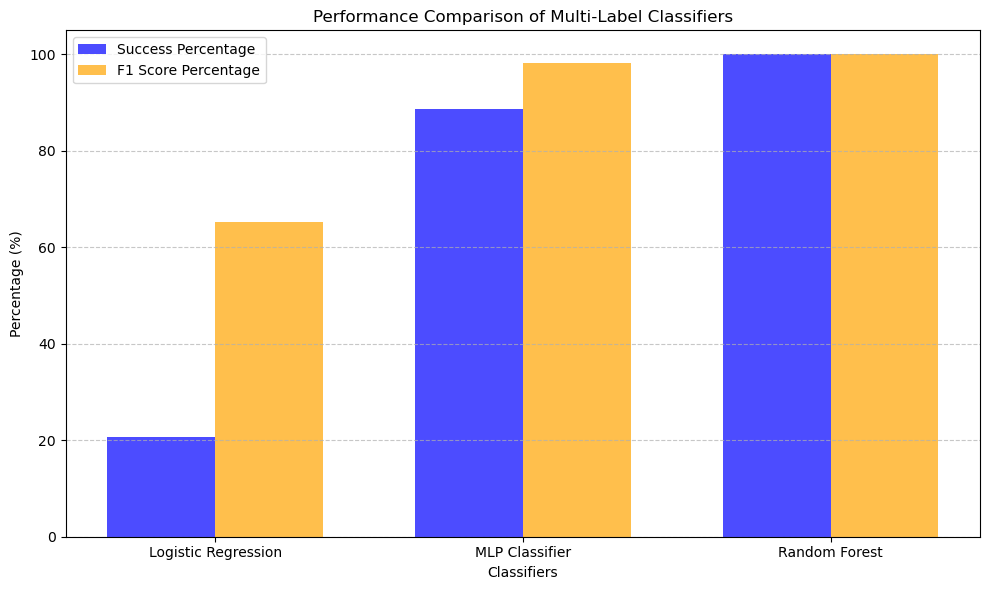

In [14]:
import warnings
warnings.filterwarnings("ignore") 

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# File paths
train_data = "MultLabelTrainData.txt"
train_label = "MultLabelTrainLabel.txt"
test_data = "MultLabelTestData.txt"

# Load the data with raw string format to handle escape sequences properly
data = pd.read_table(train_data, sep=r'\s+', header=None)
labels = pd.read_table(train_label, sep=r'\s+', header=None)
test = pd.read_table(test_data, sep=r'\s+', header=None)

# Convert to NumPy arrays
X_train = data.values
X_test = test.values
y_train = labels.values

# MinMax Normalization
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the base classifiers
logistic_classifier = LogisticRegression(max_iter=1000)
mlp_classifier = MLPClassifier(
    max_iter=2000,           # Increased max_iter for more training iterations
    learning_rate_init=0.001, # Lowered learning rate to improve convergence
    solver='adam',            # Using the default 'adam' solver
    hidden_layer_sizes=(50,)  # Reduced hidden layer size for better convergence
)
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize the MultiOutputClassifiers with the base classifiers
logistic_multi_label_classifier = MultiOutputClassifier(logistic_classifier, n_jobs=-1)
mlp_multi_label_classifier = MultiOutputClassifier(mlp_classifier, n_jobs=-1)
rf_multi_label_classifier = MultiOutputClassifier(random_forest_classifier, n_jobs=-1)

# Train the multi-label classifiers
logistic_multi_label_classifier.fit(X_train, y_train)
mlp_multi_label_classifier.fit(X_train, y_train)
rf_multi_label_classifier.fit(X_train, y_train)

# Make predictions on the test set
logistic_y_pred = logistic_multi_label_classifier.predict(X_test)
mlp_y_pred = mlp_multi_label_classifier.predict(X_test)
rf_y_pred = rf_multi_label_classifier.predict(X_test)

# Save predictions to output text files
np.savetxt('SakhamuriMultiLabelTestPredLR.txt', logistic_y_pred, fmt='%d', delimiter='\t')
np.savetxt('SakhamuriMultiLabelTestPredMLP.txt', mlp_y_pred, fmt='%d', delimiter='\t')
np.savetxt('SakhamuriMultiLabelTestPredRF.txt', rf_y_pred, fmt='%d', delimiter='\t')

# Calculate accuracy and F1 score for each model
logistic_accuracy = accuracy_score(y_train, logistic_multi_label_classifier.predict(X_train)) * 100
mlp_accuracy = accuracy_score(y_train, mlp_multi_label_classifier.predict(X_train)) * 100
rf_accuracy = accuracy_score(y_train, rf_multi_label_classifier.predict(X_train)) * 100

logistic_f1 = f1_score(y_train, logistic_multi_label_classifier.predict(X_train), average='samples') * 100
mlp_f1 = f1_score(y_train, mlp_multi_label_classifier.predict(X_train), average='samples') * 100
rf_f1 = f1_score(y_train, rf_multi_label_classifier.predict(X_train), average='samples') * 100

# Print metrics
print(f"Logistic Regression - Success Percentage: {logistic_accuracy:.2f}%, F1 Score: {logistic_f1:.2f}%")
print(f"MLP Classifier - Success Percentage: {mlp_accuracy:.2f}%, F1 Score: {mlp_f1:.2f}%")
print(f"Random Forest - Success Percentage: {rf_accuracy:.2f}%, F1 Score: {rf_f1:.2f}%")

# Visualization Function
def plot_metrics(metrics, title):
    classifiers = list(metrics.keys())
    accuracies = [metrics[clf]['Accuracy'] for clf in classifiers]
    f1_scores = [metrics[clf]['F1 Score'] for clf in classifiers]

    x = np.arange(len(classifiers))
    bar_width = 0.35

    plt.figure(figsize=(10, 6))
    plt.bar(x - bar_width/2, accuracies, bar_width, label='Success Percentage', color='blue', alpha=0.7)
    plt.bar(x + bar_width/2, f1_scores, bar_width, label='F1 Score Percentage', color='orange', alpha=0.7)

    plt.xlabel('Classifiers')
    plt.ylabel('Percentage (%)')
    plt.title(title)
    plt.xticks(x, classifiers)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot comparison
metrics = {
    'Logistic Regression': {'Accuracy': logistic_accuracy, 'F1 Score': logistic_f1},
    'MLP Classifier': {'Accuracy': mlp_accuracy, 'F1 Score': mlp_f1},
    'Random Forest': {'Accuracy': rf_accuracy, 'F1 Score': rf_f1}
}

plot_metrics(metrics, "Performance Comparison of Multi-Label Classifiers")
